In [66]:
import pandas as pd
df_nn = pd.read_csv('D:\ds\data preprocessing\data\waves_att.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vivek\AppData\Local\Temp\ipykernel_18416\2753670479.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_nn = pd.read_csv('D:\ds\data preprocessing\data\waves_att.csv')


In [67]:
df_nn.head()

,Unnamed: 0,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,DISTANCE_FROM_SOURCE,TRAVEL_TIME_HOURS,MEASUREMENT_TYPE,MAXIMUM_HEIGHT
0,2599,1150,28276,1884,11.0,15.0,255.0,4.0,1.0,2.3
1,2600,1150,28277,1884,11.0,15.0,255.0,4.0,1.0,2.3
2,2691,1200,28469,1892,12.0,9.0,35.0,4.0,1.0,2.3
3,2692,1200,10475,1892,12.0,9.0,21.0,4.0,1.0,2.3
4,2697,1203,1421,1893,6.0,4.0,370.0,4.0,1.0,2.5


In [68]:
df_nn = df_nn.loc[:, ~df_nn.columns.str.contains('^Unnamed')]

In [69]:
df_nn.head()

,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,DISTANCE_FROM_SOURCE,TRAVEL_TIME_HOURS,MEASUREMENT_TYPE,MAXIMUM_HEIGHT
0,1150,28276,1884,11.0,15.0,255.0,4.0,1.0,2.3
1,1150,28277,1884,11.0,15.0,255.0,4.0,1.0,2.3
2,1200,28469,1892,12.0,9.0,35.0,4.0,1.0,2.3
3,1200,10475,1892,12.0,9.0,21.0,4.0,1.0,2.3
4,1203,1421,1893,6.0,4.0,370.0,4.0,1.0,2.5


In [70]:
# now we need to rescale the data to expose the structure of the data to the model
#1)minmaxscaler-This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. It is also useful for algorithms that weight inputs
# like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors
#2)standardscaler- used when the attrubutes are of guassian distribution,work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.


In [71]:
# lets analyze the data with histograms

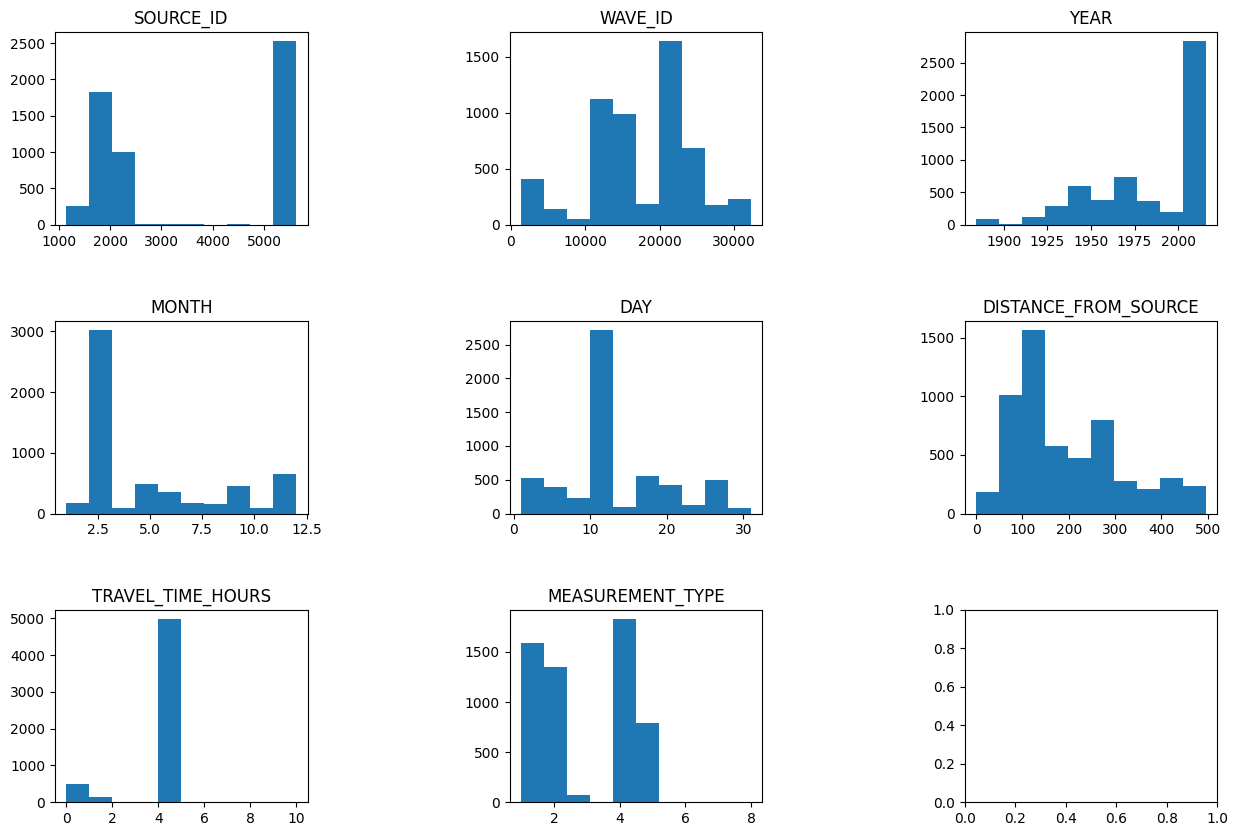

In [72]:
import matplotlib.pyplot as plt
cols = list(df_nn.columns)
k=0
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i in range(0,3):
    for j in range(0,3):
        if(i==2 and j>1):
            break
        axs[i,j].hist(df_nn[cols[k]],bins=10)
        axs[i,j].set_title(cols[k])
        k+=1
plt.subplots_adjust(wspace=0.8, hspace=0.5)
plt.show()


In [73]:
# year,month,source_id and distance_from_source are skewed datas
# waveid,measurement_type,travel_time_hours seems like normal distribtution

In [74]:
df_nn.columns

Index(['SOURCE_ID', 'WAVE_ID', 'YEAR', 'MONTH', 'DAY', 'DISTANCE_FROM_SOURCE',
       'TRAVEL_TIME_HOURS', 'MEASUREMENT_TYPE', 'MAXIMUM_HEIGHT'],
      dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
normal_scaler = StandardScaler()
skewed_scaler = MinMaxScaler()
mm = df_nn[['YEAR','MONTH','DISTANCE_FROM_SOURCE','SOURCE_ID']]
sd = df_nn[['WAVE_ID','TRAVEL_TIME_HOURS','MEASUREMENT_TYPE']]

In [76]:
re_mm = skewed_scaler.fit_transform(mm)
re_sd = normal_scaler.fit_transform(sd) # mean=0, standard_deviation=1

In [77]:
re_mm

array([[0.        , 0.90909091, 0.5141129 , 0.        ],
       [0.        , 0.90909091, 0.5141129 , 0.        ],
       [0.06060606, 1.        , 0.07056452, 0.01119069],
       ...,
       [1.        , 0.90909091, 0.20766129, 1.        ],
       [1.        , 0.90909091, 0.24193548, 1.        ],
       [1.        , 0.90909091, 0.62298387, 1.        ]])

In [78]:
re_sd

array([[ 1.56847345,  0.34532555, -1.20383672],
       [ 1.56861783,  0.34532555, -1.20383672],
       [ 1.59633829,  0.34532555, -1.20383672],
       ...,
       [ 2.13804235,  0.34532555, -1.20383672],
       [ 2.13789798,  0.34532555, -1.20383672],
       [ 2.13760922,  0.34532555, -0.53802224]])

In [79]:
df_nn[['YEAR','MONTH','DISTANCE_FROM_SOURCE','SOURCE_ID']]=re_mm

In [80]:
df_nn[['WAVE_ID','TRAVEL_TIME_HOURS','MEASUREMENT_TYPE']]=re_sd

In [81]:
df_nn.head()

,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,DISTANCE_FROM_SOURCE,TRAVEL_TIME_HOURS,MEASUREMENT_TYPE,MAXIMUM_HEIGHT
0,0.000000,1.568473,0.000000,0.909091,15.0,0.514113,0.345326,-1.203837,2.3
1,0.000000,1.568618,0.000000,0.909091,15.0,0.514113,0.345326,-1.203837,2.3
2,0.011191,1.596338,0.060606,1.000000,9.0,0.070565,0.345326,-1.203837,2.3
3,0.011191,-1.001589,0.060606,1.000000,9.0,0.042339,0.345326,-1.203837,2.3
4,0.011862,-2.308782,0.068182,0.454545,4.0,0.745968,0.345326,-1.203837,2.5


In [82]:
# splitting the data kfoldcrossvalidation to give chance ofr every part of the data for evaluation
# kfoldcroassvalidation is gold technique to evaluate the model

array = df_nn.values
X = array[:,0:8]
Y = array[:,8]

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds)

In [84]:
# knn,randomforestregressor,decisiontreeregressor,svm are some of the non-linear regression models
# you can experiment multiple models and check which model is predicting well
# in machine learning there is no standard model, you need to experiment and find out which is best for your data

In [111]:
# we will use knn regressor now, because it has higher prediction as compared to
# linear regression and takes care of non-linearity
from sklearn.metrics import mean_squared_error,make_scorer, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
error = make_scorer(mean_absolute_error)
results = cross_val_score(model, X, Y, cv=kfold,scoring=error)

In [112]:
results.mean()

1.2193698581560282

In [ ]:
# smaller the error, better the model